<a href="https://colab.research.google.com/github/dimasadhinugroho888/Analisis-Pola-Volume-Curah-Hujan-Jumlah-Hari-Hujan-dan-Curah-Hujan-Maksimum-di-Kota-Bogor-Tahun-2022/blob/main/Analisis_Pola_Volume_Curah_Hujan%2C_Jumlah_Hari_Hujan%2C_dan_Curah_Hujan_Maksimum_Bulanan_di_Kota_Bogor_Tahun_2022.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

>>> Langkah 1: Silakan Unggah File EXCEL (.xlsx) Curah Hujan Anda <<<


Saving Volume Curah Hujan, Jumlah Hari Hujan, dan Curah Hujan Maksimum di Kota Bogor Tahun 2022.xlsx to Volume Curah Hujan, Jumlah Hari Hujan, dan Curah Hujan Maksimum di Kota Bogor Tahun 2022.xlsx

--- Data Setelah Feature Engineering ---
        Bulan  Curah Hujan MAX (mm/Hari) Kategori Intensitas MAX
0    Februari                       31.0           Lebat (20-50)
1       Maret                       24.0           Lebat (20-50)
2       April                       86.3   Sangat Lebat (50-100)
3         Mei                       48.5           Lebat (20-50)
4        Juni                      130.4          Ekstrem (>100)
5        Juli                      155.2          Ekstrem (>100)
6     Agustus                       58.5   Sangat Lebat (50-100)
7   September                       58.2   Sangat Lebat (50-100)
8     Oktober                       79.7   Sangat Lebat (50-100)
9    November                       52.0   Sangat Lebat (50-100)
10   Desember                       35.5     

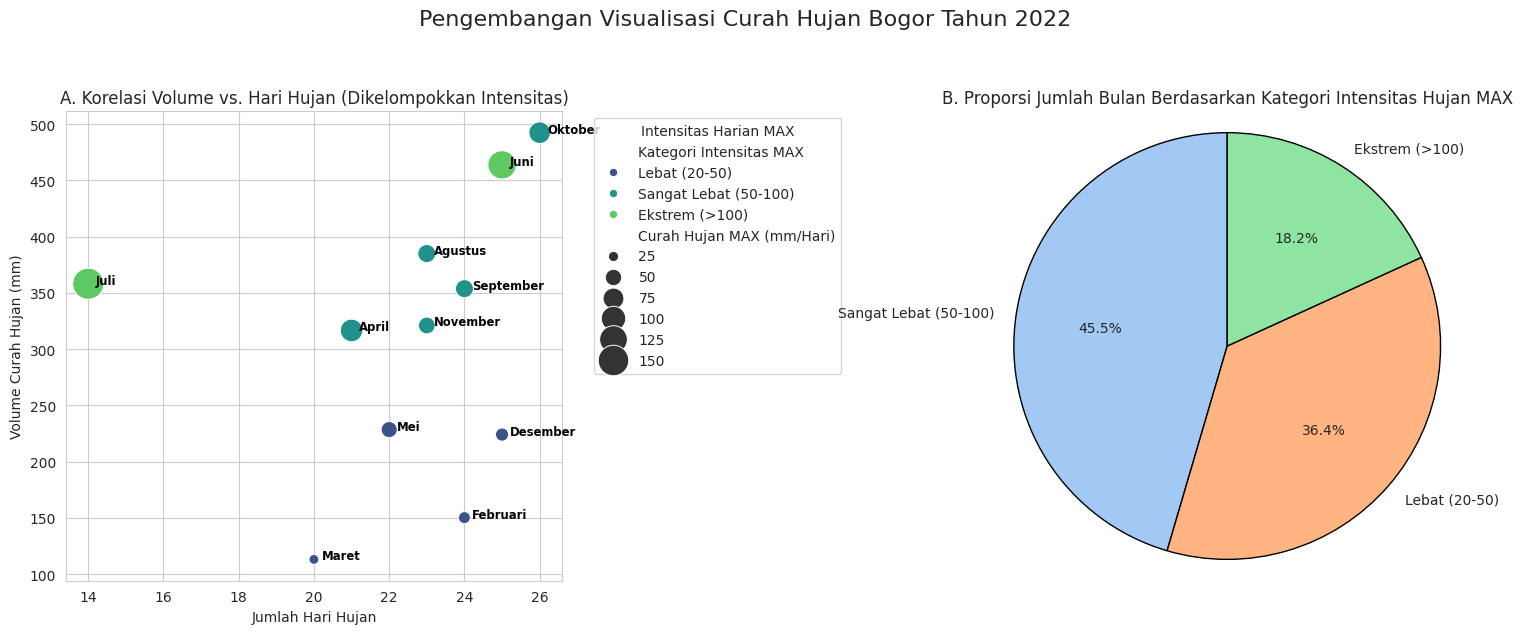

In [10]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from google.colab import files
import io

# -----------------------------------------------------------
# --- 1. Mengunggah dan Memuat Data Excel ---
# -----------------------------------------------------------
print(">>> Langkah 1: Silakan Unggah File EXCEL (.xlsx) Curah Hujan Anda <<<")
uploaded = files.upload()
file_name = next(iter(uploaded))

# Membaca file XLSX, melewati 4 baris header, dan memilih kolom B hingga E
df = pd.read_excel(io.BytesIO(uploaded[file_name]),
                   skiprows=4,
                   usecols='B:E')

# Ganti nama kolom
df.columns = ['Bulan', 'Volume Curah Hujan (mm)', 'Jumlah Hari Hujan', 'Curah Hujan MAX (mm/Hari)']

# Hapus baris tambahan, hanya ambil 12 baris data bulanan
df = df.head(12)

# --- 2. Pembersihan & Feature Engineering ---

kolom_numerik = ['Volume Curah Hujan (mm)', 'Jumlah Hari Hujan', 'Curah Hujan MAX (mm/Hari)']

for col in kolom_numerik:
    df[col] = pd.to_numeric(df[col], errors='coerce')

df.dropna(subset=kolom_numerik, inplace=True)

# Menghitung Rasio Intensitas Hujan
df['Rata-rata Curah Hujan Harian (mm/hari)'] = df['Volume Curah Hujan (mm)'] / df['Jumlah Hari Hujan']

# Fungsi Klasifikasi Intensitas Hujan Harian (Berdasarkan BMKG)
def classify_intensity(max_ch):
    if max_ch >= 100.0:
        return 'Ekstrem (>100)'
    elif max_ch >= 50.0:
        return 'Sangat Lebat (50-100)'
    elif max_ch >= 20.0:
        return 'Lebat (20-50)'
    elif max_ch >= 5.0:
        return 'Sedang (5-20)'
    else:
        return 'Ringan (<5)'

# Menambahkan kolom klasifikasi baru berdasarkan Curah Hujan MAX
df['Kategori Intensitas MAX'] = df['Curah Hujan MAX (mm/Hari)'].apply(classify_intensity)

# Tampilkan data frame yang sudah bersih dan kaya fitur
print("\n--- Data Setelah Feature Engineering ---")
print(df[['Bulan', 'Curah Hujan MAX (mm/Hari)', 'Kategori Intensitas MAX']])
print("\n")


# -----------------------------------------------------------
# --- 3. Analisis dan Visualisasi Pengembangan ---
# -----------------------------------------------------------

print("="*80)
print("             ANALISIS PENGEMBANGAN: KLASIFIKASI INTENSITAS")
print("="*80)

# Analisis Kategori Intensitas
kategori_counts = df['Kategori Intensitas MAX'].value_counts().sort_index(ascending=False)
print("Distribusi Bulanan Berdasarkan Kategori Curah Hujan Harian Maksimum:")
print(kategori_counts)

# Visualisasi Lanjutan A: Scatter Plot (Volume vs. Hari Hujan)
sns.set_style("whitegrid")
plt.figure(figsize=(15, 6))
plt.suptitle('Pengembangan Visualisasi Curah Hujan Bogor Tahun 2022', fontsize=16, y=1.05)

plt.subplot(1, 2, 1)
# Scatter plot untuk melihat korelasi dan menyoroti bulan ekstrem
sns.scatterplot(x='Jumlah Hari Hujan',
                y='Volume Curah Hujan (mm)',
                data=df,
                hue='Kategori Intensitas MAX', # Mewarnai titik berdasarkan kategori intensitas
                size='Curah Hujan MAX (mm/Hari)', # Ukuran titik berdasarkan nilai MAX
                sizes=(50, 500), # Rentang ukuran titik
                palette='viridis')
plt.title('A. Korelasi Volume vs. Hari Hujan (Dikelompokkan Intensitas)')
plt.xlabel('Jumlah Hari Hujan')
plt.ylabel('Volume Curah Hujan (mm)')
plt.legend(title='Intensitas Harian MAX', bbox_to_anchor=(1.05, 1), loc=2)

# Tambahkan label bulan pada titik (opsional, untuk identifikasi bulan yang ekstrem)
for line in range(0, df.shape[0]):
     plt.text(df['Jumlah Hari Hujan'][line]+0.2, df['Volume Curah Hujan (mm)'][line],
             df['Bulan'][line], horizontalalignment='left', size='small', color='black', weight='semibold')


# Visualisasi Lanjutan B: Pie Chart (Distribusi Kategori)
plt.subplot(1, 2, 2)
colors = sns.color_palette('pastel')[0:len(kategori_counts)]
plt.pie(kategori_counts,
        labels=kategori_counts.index,
        colors=colors,
        autopct='%1.1f%%',
        startangle=90,
        wedgeprops={'edgecolor': 'black'})
plt.title('B. Proporsi Jumlah Bulan Berdasarkan Kategori Intensitas Hujan MAX')
plt.axis('equal') # Memastikan diagram berbentuk lingkaran


plt.tight_layout()
plt.show()